- Inspect files in the dataset
- Filter the PPG signals in the dataset to remove noisy signals based on PPG signal quality indices from the literature 
  - 0.11 Skewness: Elgendi, Mohamed. (2016). Optimal Signal Quality Index for Photoplethysmogram Signals. Bioengineering. 3. 21. 10.3390/bioengineering3040021.
  - 6 dB Signal to Noise Ratio: Zaunseder, Sebastian & Vehkaoja, Antti & Fleischhauer, Vincent & Hoog Antink, Christoph. (2022). Signal-to-noise ratio is more important than sampling rate in beat-to-beat interval estimation from optical sensors. 

In [12]:
%load_ext autoreload
%autoreload 2

import pyVHR as vhr
import numpy as np
from pyVHR.analysis.pipelineLandmarks import *
import plotly.express as px

import constants
import pandas as pd
import numpy as np
import pandas as pd
import scipy

vhr.plot.VisualizeParams.renderer = 'vscode' 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [28]:
winsize = 10
DATASETS = ['mr_nirp', 'ubfc_phys', 'lgi_ppgi']

# Dataset Inspection

## UBFC-PHYS

- rest task T1
- speech task T2
- arithmetic task T3

In [2]:
# -- LOAD A DATASET

dataset_name = 'ubfc_phys'
pipeline = PipielineLandmarks()
dataset = pipeline.get_dataset(dataset_name)
videoFPS, sigFPS = constants.get_fps(dataset_name)
print(f"{dataset_name.upper()}: Video fps = {videoFPS}, Signal fps = {sigFPS}")

allvideo = dataset.videoFilenames
videos = constants.get_video_settings(dataset_name)
print("Indexes of videos with specific settings: ", videos)

# print the list of video names with the progressive index (idx)
for v in range(len(allvideo)):
  print(v, allvideo[v])

UBFC_PHYS: Video fps = 35, Signal fps = 64
Indexes of videos with specific settings:  {'STILL': array([  0,   3,   6,   9,  12,  15,  18,  21,  24,  27,  30,  33,  36,
        39,  42,  45,  48,  51,  54,  57,  60,  63,  66,  69,  72,  75,
        78,  81,  84,  87,  90,  93,  96,  99, 102, 105, 108, 111, 114,
       117, 120, 123, 126, 129, 132, 135, 138, 141, 144, 147, 150, 153,
       156, 159, 162, 165]), 'MALE': [0, 30, 33, 51, 63, 84, 93, 123, 126, 129], 'FEMALE': [3, 6, 9, 12, 15, 18, 21, 24, 27, 36, 39, 42, 45, 48, 54, 57, 60, 66, 69, 72, 75, 78, 81, 87, 90, 96, 99, 102, 105, 108, 111, 114, 117, 120, 132, 135, 138, 141, 144, 147, 150, 153, 156, 159, 162, 165], 'GLASSES': [18, 21, 24, 30, 69, 81, 84, 99, 108, 117, 156, 159, 165], 'BEARD': [30, 93, 126, 129], 'DARK': [90, 126, 135, 153, 159], 'BANG': [54, 57, 63, 69, 123, 138, 141, 162]}
0 D:/datasets_rppg/UBFC-Phys\s1\vid_s1_T1.avi
1 D:/datasets_rppg/UBFC-Phys\s1\vid_s1_T2.avi
2 D:/datasets_rppg/UBFC-Phys\s1\vid_s1_T3.avi
3 D:/d

videoFileName :  D:/datasets_rppg/UBFC-Phys\s12\vid_s12_T1.avi
Video frame rate:      35 35.138
Length of the video: 1:05 min, timesGT is 180 s
Signal frame rate is 64 for UBFC_PHYS and signal is  180.0 seconds worth


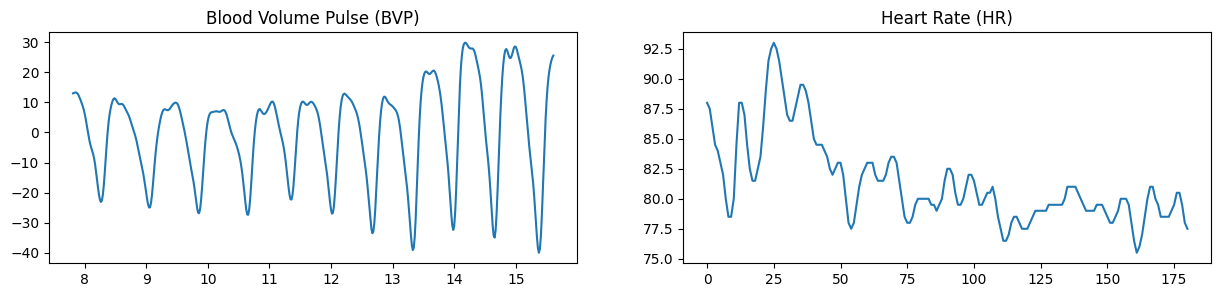

In [7]:
# -- PARAMETER SETTING

videoIdx = 9
fname = dataset.getSigFilename(videoIdx)
videoFileName = dataset.getVideoFilename(videoIdx)
fps = vhr.extraction.get_fps(videoFileName)
sigGT = dataset.readSigfile(fname)
bpmGT, timesGT = sigGT.getBPM(winsize) # STFT 42-240 BPM

print("videoFileName : ", videoFileName)
print('Video frame rate:     ',videoFPS, fps)
print(f"Length of the video: 1:05 min, timesGT is {len(timesGT)-1} s")
print(f"Signal frame rate is {sigFPS} for {dataset_name.upper()} and signal is ", sigGT.data.shape[1] / sigFPS, "seconds worth")

fig, ax = plt.subplots(1,2,figsize=(15,3))
ax[0].plot(np.arange(0, len(timesGT), 1/sigFPS)[500:1000], sigGT.data.T[500:1000])
ax[0].set_title('Blood Volume Pulse (BVP)')
ax[1].plot(timesGT, bpmGT)
ax[1].set_title('Heart Rate (HR)')
plt.show()

## LGI-PPGI

reference

In [8]:
# -- LOAD A DATASET

dataset_name = 'lgi_ppgi'    
pipeline = PipielineLandmarks()
dataset = pipeline.get_dataset(dataset_name)
videoFPS, sigFPS = constants.get_fps(dataset_name)
print(f"{dataset_name.upper()}: Video fps = {videoFPS}, Signal fps = {sigFPS}")

allvideo = dataset.videoFilenames
videos = constants.get_video_settings(dataset_name)
print("Indexes of videos with specific settings: ", videos)

# print the list of video names with the progressive index (idx)
for v in range(len(allvideo)):
  print(v, allvideo[v])

LGI_PPGI: Video fps = 25, Signal fps = 60
Indexes of videos with specific settings:  {'GYM': array([ 0,  4,  8, 12, 16, 20]), 'STILL': array([ 1,  5,  9, 13, 17, 21]), 'ROTATION': array([ 2,  6, 10, 14, 18, 22]), 'TALK': array([ 3,  7, 11, 15, 19]), 'MALE': array([ 4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,
       21, 22, 23]), 'FEMALE': [0, 1, 2, 3], 'BEARD': array([ 4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,
       21, 22, 23]), 'GLASSES': [0, 1, 2, 3]}
0 D:/datasets_rppg/lgi_ppgi\alex\alex_gym\cv_camera_sensor_stream_handler.avi
1 D:/datasets_rppg/lgi_ppgi\alex\alex_resting\cv_camera_sensor_stream_handler.avi
2 D:/datasets_rppg/lgi_ppgi\alex\alex_rotation\cv_camera_sensor_stream_handler.avi
3 D:/datasets_rppg/lgi_ppgi\alex\alex_talk\cv_camera_sensor_stream_handler.avi
4 D:/datasets_rppg/lgi_ppgi\angelo\angelo_gym\cv_camera_sensor_stream_handler.avi
5 D:/datasets_rppg/lgi_ppgi\angelo\angelo_resting\cv_camera_sensor_stream_handler.avi
6 

videoFileName :  D:/datasets_rppg/lgi_ppgi\cpi\cpi_resting\cv_camera_sensor_stream_handler.avi
Video frame rate:      25 25.0
Length of the video: 1:05 min, timesGT is 74 s
Signal frame rate is 60 for LGI_PPGI and signal is  73.76666666666667 seconds worth


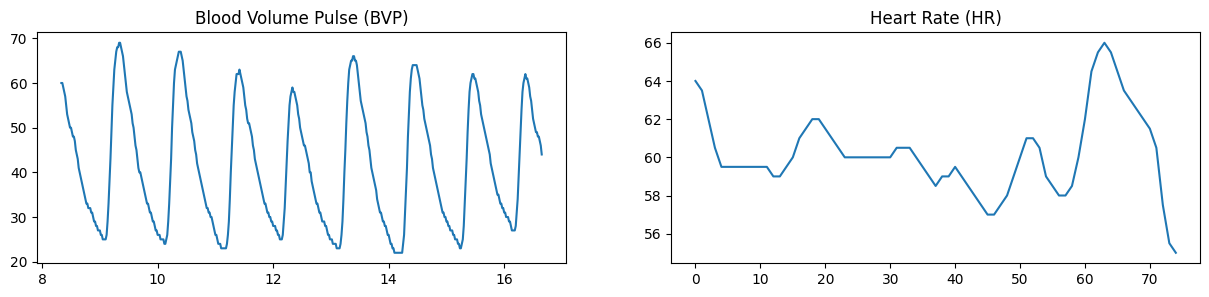

In [9]:
# -- PARAMETER SETTING

videoIdx = 9
fname = dataset.getSigFilename(videoIdx)
videoFileName = dataset.getVideoFilename(videoIdx)
fps = vhr.extraction.get_fps(videoFileName)
sigGT = dataset.readSigfile(fname)
bpmGT, timesGT = sigGT.getBPM(winsize) # STFT 42-240 BPM

print("videoFileName : ", videoFileName)
print('Video frame rate:     ',videoFPS, fps)
print(f"Length of the video: 1:05 min, timesGT is {len(timesGT)-1} s")
print(f"Signal frame rate is {sigFPS} for {dataset_name.upper()} and signal is ", sigGT.data.shape[1] / sigFPS, "seconds worth")

fig, ax = plt.subplots(1,2,figsize=(15,3))
ax[0].plot(np.arange(0, len(timesGT), 1/sigFPS)[500:1000], sigGT.data.T[500:1000])
ax[0].set_title('Blood Volume Pulse (BVP)')
ax[1].plot(timesGT, bpmGT)
ax[1].set_title('Heart Rate (HR)')
plt.show()

## MR NIRP

- Pulse oximeter measurements (same as LGI-PPGI)
- The raw 10-bit images were recorded with 640 × 640 resolution at 30 fps. -> avi is 25 though
- We used a CMS 50D+ finger pulse oximeter to obtain a  round-truth PPG waveform recorded at 60 fps

In [10]:
# -- LOAD A DATASET

dataset_name = 'mr_nirp'    
pipeline = PipielineLandmarks()
dataset = pipeline.get_dataset(dataset_name)
videoFPS, sigFPS = constants.get_fps(dataset_name)
print(f"{dataset_name.upper()}: Video fps = {videoFPS}, Signal fps = {sigFPS}")

allvideo = dataset.videoFilenames
videos = constants.get_video_settings(dataset_name)
print("Indexes of videos with specific settings: ", videos)

# print the list of video names with the progressive index (idx)
for v in range(len(allvideo)):
  print(v, allvideo[v])

MR_NIRP: Video fps = 30, Signal fps = 60
Indexes of videos with specific settings:  {'MOTION': [0, 2, 4, 6, 9, 11, 13], 'STILL': [1, 3, 5, 7, 8, 10, 12, 14], 'MALE': [0, 1, 4, 5, 6, 7, 8, 9, 10, 13, 14], 'FEMALE': [2, 3, 11, 12], 'BEARD': [0, 1, 4, 5, 8, 9, 10, 13, 14], 'DARK': [0, 1, 2, 3, 4, 5, 13, 14]}
0 D:/datasets_rppg/MR-NIRP_indoor\Subject1_motion_940\Subject1_motion_940\RGB_corrected\Subject1_motion_940.avi
1 D:/datasets_rppg/MR-NIRP_indoor\Subject1_still_940-015\Subject1_still_940\RGB_corrected\Subject1_still_940.avi
2 D:/datasets_rppg/MR-NIRP_indoor\Subject2_motion_940\Subject2_motion_940\RGB_corrected\Subject2_motion_940.avi
3 D:/datasets_rppg/MR-NIRP_indoor\Subject2_still_940-002\Subject2_still_940\RGB_corrected\Subject2_still_940.avi
4 D:/datasets_rppg/MR-NIRP_indoor\Subject3_motion_940\Subject3_motion_940\RGB_corrected\Subject3_motion_940.avi
5 D:/datasets_rppg/MR-NIRP_indoor\Subject3_still_940-012\Subject3_still_940\RGB_corrected\Subject3_still_940.avi
6 D:/datasets_rppg

videoFileName :  D:/datasets_rppg/MR-NIRP_indoor\Subject1_still_940-015\Subject1_still_940\RGB_corrected\Subject1_still_940.avi
Video frame rate:      30 30.0
Length of the video: 1:05 min, timesGT is 179 s
Signal frame rate is 60 for MR_NIRP and signal is  178.38333333333333 seconds worth


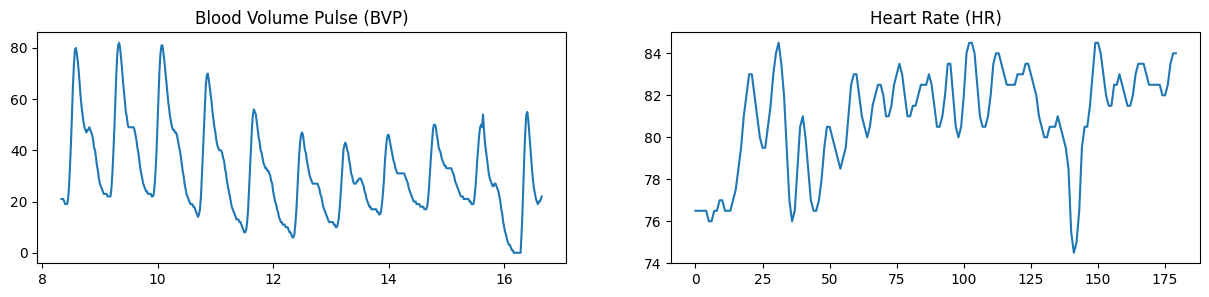

In [11]:
# -- PARAMETER SETTING

videoIdx = 1
fname = dataset.getSigFilename(videoIdx)
videoFileName = dataset.getVideoFilename(videoIdx)
fps = vhr.extraction.get_fps(videoFileName)
sigGT = dataset.readSigfile(fname)
bpmGT, timesGT = sigGT.getBPM(winsize) # STFT 42-240 BPM

print("videoFileName : ", videoFileName)
print('Video frame rate:     ',videoFPS, fps)
print(f"Length of the video: 1:05 min, timesGT is {len(timesGT)-1} s")
print(f"Signal frame rate is {sigFPS} for {dataset_name.upper()} and signal is ", sigGT.data.shape[1] / sigFPS, "seconds worth")

fig, ax = plt.subplots(1,2,figsize=(15,3))
ax[0].plot(np.arange(0, len(timesGT), 1/sigFPS)[500:1000], sigGT.data.T[500:1000])
ax[0].set_title('Blood Volume Pulse (BVP)')
ax[1].plot(timesGT, bpmGT)
ax[1].set_title('Heart Rate (HR)')
plt.show()

# PPG Signal Quality

- Define SNR as power ratio between PPG signal and reference noise signal in FT.
- Calculate skewness and SNR for all videos

## Define noise signal

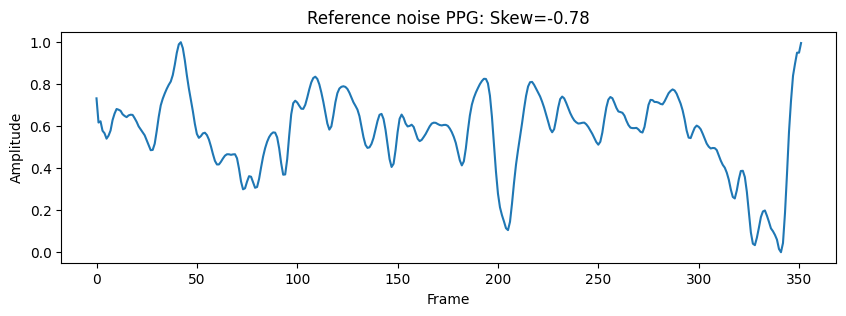

In [17]:
videoIdx = 18 # bad quality signal index
videoFPS, sigFPS = constants.get_fps('UBFC_PHYS')
duration = sigFPS * 60

pipeline = PipielineLandmarks()
dataset = pipeline.get_dataset('ubfc_phys')
PPG_win, bpmGT, timesGT, fname = pipeline.get_signal_data(videoIdx, dataset, winsize, stride=1)
i = 4
noise_win = PPG_win[i].reshape(1,-1) # (-0.57)
plt.figure(figsize=(10,3))
plt.plot(noise_win[0])
plt.title(f'Reference noise PPG: Skew={np.round(scipy.stats.skew(noise_win[0]),2)}')
plt.ylabel('Amplitude')
plt.xlabel('Frame')
plt.show()

Text(0.5, 1.0, 'vid_s15_T1: PPG pulses')

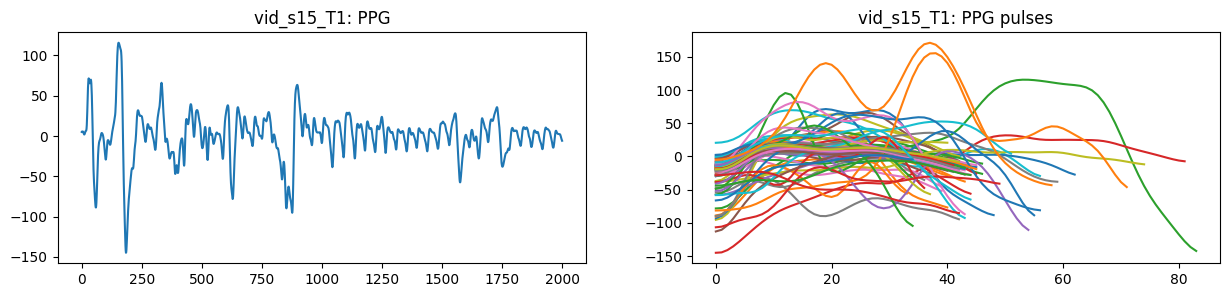

In [25]:
# Plot entire PPG and PPG pulses from the noisy subject

fname = dataset.getSigFilename(videoIdx)
sigGT = dataset.readSigfile(fname)
PPG = sigGT.data.T.reshape(-1,1,1)[:duration] # shape (n,nb_ldmk,RGB)

interval = [0,2000]
PPG_win, bpmGT, timesGT, fname = pipeline.get_signal_data(videoIdx, dataset, winsize, stride=winsize)
PPG = sigGT.data.T.flatten()[:duration]
peaks, _ = scipy.signal.find_peaks(-PPG,distance=30)  # Find the peaks in the inverted signal, so min

fig, axs = plt.subplots(1,2,figsize=(15,3))
axs[0].plot(PPG[interval[0]:interval[1]])
axs[0].set_title(f'{fname}: PPG')

# PPG pulses: all signal between peaks
ppg_pulse = []
for i in range(len(peaks)-1):
    ppg_pulse.append(PPG[peaks[i]:peaks[i+1]])
for ppg in ppg_pulse:
    axs[1].plot(ppg)
axs[1].set_title(f'{fname}: PPG pulses')

Text(0.5, 1.0, 'vid_s15_T1: SNR over entire PPG (taking 8s windows)')

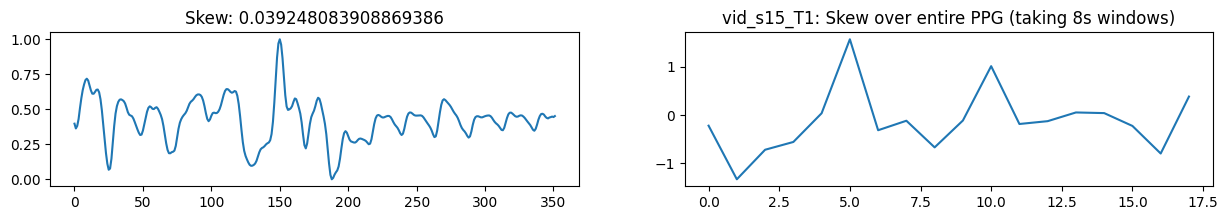

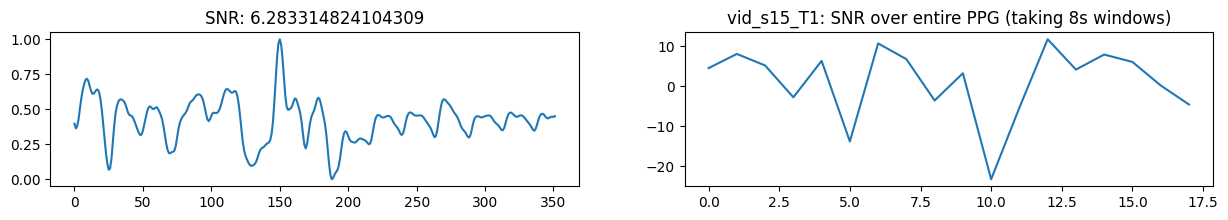

In [26]:
# SNR definition

from pyVHR.BPM.utils import Welch
def signaltonoise(bvps, fps, noise_win):
    '''Computes the signal-to-noise ratio of the BVP
    signals according to the method by -- de Haan G. et al., IEEE Transactions on Biomedical Engineering (2013).
    SNR calculated as the ratio (in dB) of power and sum of all other power between 0.5 and 4 Hz.
    Adapted from https://github.com/danmcduff/iphys-toolbox/blob/master/tools/bvpsnr.m
    '''

    NyquistF = fps/2.
    FResBPM = 0.5
    nfft = np.ceil((60*2*NyquistF)/FResBPM)
    pfreqs, power = Welch(bvps, fps, nfft=nfft)
    _, noise_power = Welch(noise_win, fps, nfft=nfft)
    win_snr = []
    for i in range(len(power)):
        p = power[i,:]
        SPower = np.sum(p**2)
        noisePower = np.sum(noise_power**2)
        snr = 10*np.log10(np.abs(SPower)/np.abs(noisePower))
        win_snr.append(snr)
    
    return np.array(win_snr)

skewness = scipy.stats.skew(PPG_win, axis=1)
snr = signaltonoise(np.array(PPG_win), sigFPS, noise_win)
i = 4
fig, ax = plt.subplots(1,2,figsize=(15,2))
ax[0].plot(PPG_win[i])
ax[0].set_title(f'Skew: {skewness[i]}')
ax[1].plot(skewness)
ax[1].set_title(f'{fname}: Skew over entire PPG (taking 8s windows)')

fig, ax = plt.subplots(1,2,figsize=(15,2))
ax[0].plot(PPG_win[i])
ax[0].set_title(f'SNR: {snr[i]}')
ax[1].plot(snr)
ax[1].set_title(f'{fname}: SNR over entire PPG (taking 8s windows)')

## PPG Signal Quality Index for all videos

- Only for still videos

In [33]:
# Get Skewness and SNR for all videos
datas = []
pipeline = PipielineLandmarks()

for dataset_name in DATASETS:
    dataset = pipeline.get_dataset(dataset_name)
    allvideo = dataset.videoFilenames

    for videoIdx, videoFileName in enumerate(allvideo):
        if dataset_name == 'ubfc_phys' and 'T1' not in videoFileName:
            continue
        if dataset_name == 'mr_nirp' and 'still' not in videoFileName:
            continue
        PPG_win, bpmGT, timesGT, fname = pipeline.get_signal_data(videoIdx, dataset, winsize, stride=winsize)
        PPG_win = PPG_win[:60]
        skewness = scipy.stats.skew(PPG_win, axis=1)
        if dataset_name == 'ubfc_phys': # UBFC_PHYS has inverted signals
            skewness = -skewness
        snr = signaltonoise(np.array(PPG_win), sigFPS, noise_win)
        datas.append([dataset_name, fname, skewness, snr])

df_stat = pd.DataFrame(datas, columns=['dataset','videoFilename','skewness', 'SNR'])
# Still videos
df_stat = df_stat[(df_stat['dataset'] == 'lgi_ppgi') & df_stat['videoFilename'].str.contains('resting') | (df_stat['dataset'] == 'mr_nirp') | (df_stat['dataset'] == 'ubfc_phys')].reset_index(drop=True)

for column in ['skewness', 'SNR']:
    df_stat[column+'_mean'] = df_stat[column].apply(lambda x: x.mean())
    df_stat[column+'_std'] = df_stat[column].apply(lambda x: x.std())
    df_stat[column+'_min'] = df_stat[column].apply(lambda x: x.min())
    df_stat[column+'_max'] = df_stat[column].apply(lambda x: x.max())
df_stat = df_stat.drop(columns=['skewness', 'SNR'])


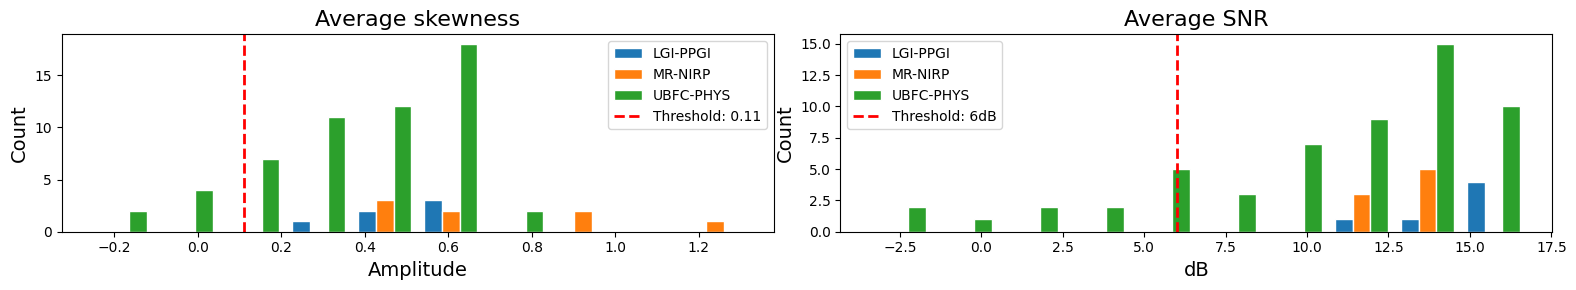

In [34]:
fig, axs = plt.subplots(1,2,figsize=(16,3))
for i, column in enumerate(['skewness_mean', 'SNR_mean']):
    axs[i].hist(
    [df_stat.loc[df_stat['dataset'] == 'lgi_ppgi', column],
     df_stat.loc[df_stat['dataset'] == 'mr_nirp', column],
     df_stat.loc[df_stat['dataset'] == 'ubfc_phys', column]],
    stacked=False, 
    label=['LGI-PPGI', 'MR-NIRP', 'UBFC-PHYS'],
    edgecolor='white')
    # Plot vertical line at 90% / 10% pecentile
    if 'skewness' in column:
        thresh = 0.11
    if 'SNR' in column:
        thresh = 6
    axs[i].axvline(thresh, color='red', linestyle='dashed', linewidth=2, label=f'Threshold: {thresh}' + f'{"dB" if "SNR" in column else ""}') 

    if 'skewness' in column:
        axs[i].set_title(f'Average {column.split("_")[0]}', fontsize=16)
        axs[i].set_xlabel('Amplitude', fontsize=14)
        axs[i].set_ylabel('Count', fontsize=14)
    else:
        axs[i].set_title(f'Average {column.split("_")[0]}', fontsize=16)
        axs[i].set_xlabel('dB', fontsize=14)
        axs[i].set_ylabel('Count', fontsize=14)
    axs[i].legend()
plt.tight_layout()

In [37]:
# Filter videos according to SNR and skewnessness
# Threshold value from literature 
tmp = df_stat.query('skewness_mean > 0.11 & SNR_mean > 6').videoFilename.unique()

print("Keep", tmp.size, " videos out of ", df_stat.videoFilename.unique().size, " videos")
eliminated = df_stat[~df_stat['videoFilename'].isin(tmp)].videoFilename.unique()
print("Eliminate: ", len(eliminated), eliminated)

Keep 59  videos out of  70  videos
Eliminate:  11 ['vid_s11_T1' 'vid_s15_T1' 'vid_s22_T1' 'vid_s24_T1' 'vid_s26_T1'
 'vid_s35_T1' 'vid_s4_T1' 'vid_s48_T1' 'vid_s54_T1' 'vid_s55_T1'
 'vid_s56_T1']
